In [34]:
import os
os.chdir('/home/victorhuang/projects/gtx')

import numpy as np
import mat73
import scipy.io as sio
import matplotlib.pyplot as plt

In [35]:
# Spatial frequency
fx = [0, 0.05, 0.1, 0.15, 0.2, 0.25] 
fx = np.array(fx)

dt_data_path = 'data/20241118_data_splited.mat'
phantom_data_path = 'data/phantom_data.mat'
cylinder_data_path_r1 = 'data/cylinder/h1_r1_d2.mat'
cylinder_data_path_r2 = 'data/cylinder/h1_r2_d2.mat'  

# Data

## DT data

In [36]:
# def load_dt_data(file_path):
#     data = sio.loadmat(file_path)
    
#     data = {k: v for k, v in data.items() if not k.startswith('__')}

#     return data

# all_data = load_dt_data('data/20241118_data_splited.mat')

# test_data = {
#     'fluorescence': all_data['test_fluorescence'],
#     'optical_props': all_data['test_optical_props'],
#     'reflectance': all_data['test_reflectance'],
#     'depth': all_data['test_depth'],
#     'concentration': all_data['test_concentration_fluor']
# }

# idx = 0
# sample_data = {
#     'fluorescence': test_data['fluorescence'][idx, :, :, :],
#     'optical_props': test_data['optical_props'][idx, :, :, :],
#     'reflectance': test_data['reflectance'][idx, :, :, :],
#     'depth': test_data['depth'][idx, :, :],
#     'concentration': test_data['concentration'][idx, :, :]
# }



## Phantom data

In [37]:
# def load_phantom_data(file_path):
#     mat_data = mat73.loadmat(file_path)
#     return mat_data

# temp_data = load_phantom_data(phantom_data_path)
# phantom_data = {
#     'fluorescence': temp_data['F'],
#     'optical_props': temp_data['OP'],
#     'reflectance': temp_data['RE'],
#     'depth': temp_data['DF'],
#     'concentration': temp_data['QF']
# }

# idx=0
# sample_data = {
#     'fluorescence': phantom_data['fluorescence'][idx, :, :, :],
#     'optical_props': phantom_data['optical_props'][idx, :, :, :],
#     'reflectance': phantom_data['reflectance'][idx, :, :, :],
#     'depth': phantom_data['depth'][idx, :, :],
#     'concentration': phantom_data['concentration'][idx, :, :]
# }


## Cylinder data

In [38]:
def load_cylinder_data(file_path):
    data = mat73.loadmat(file_path)
    return data

temp_data = load_cylinder_data(cylinder_data_path_r1)
sample_cylinder_data_r1 = {
    'fluorescence': temp_data['F'],
    'optical_props': temp_data['OP'],
    'reflectance': temp_data['RE'],
    'depth': temp_data['DF'],
    'concentration': temp_data['QF']
}

temp_data = load_cylinder_data(cylinder_data_path_r2)
sample_cylinder_data_r2 = {
    'fluorescence': temp_data['F'],
    'optical_props': temp_data['OP'],
    'reflectance': temp_data['RE'],
    'depth': temp_data['DF'],
    'concentration': temp_data['QF']
}

# Stats

In [39]:
def check_stats(data, idx=2, type='cylinder'):
    if type == 'cylinder':
        mu_a = data['optical_props'][:, :, 0]
        mu_sp = data['optical_props'][:, :, 1]
    elif type == 'phantom': # idx < 36
        mu_a = data['optical_props'][idx, :, :, 0]
        mu_sp = data['optical_props'][idx, :, :, 1]
    elif type == 'dt': # idx < 10000
        mu_a = data['optical_props'][idx, :, :, 0]
        mu_sp = data['optical_props'][idx, :, :, 1]
    else:
        raise ValueError(f'Invalid type: {type}')
    
    min_mu_a = np.min(mu_a)
    min_mu_sp = np.min(mu_sp)
    
    max_mu_a = np.max(mu_a)
    max_mu_sp = np.max(mu_sp)

    mean_mu_a = np.mean(mu_a)
    mean_mu_sp = np.mean(mu_sp)
    
    print(f'min_mu_a: {min_mu_a}, min_mu_sp: {min_mu_sp}')
    print(f'max_mu_a: {max_mu_a}, max_mu_sp: {max_mu_sp}')
    print(f'mean_mu_a: {mean_mu_a}, mean_mu_sp: {mean_mu_sp}')
    
check_stats(sample_cylinder_data_r1, type='cylinder')

min_mu_a: 0.0036402950063347816, min_mu_sp: 0.974591076374054
max_mu_a: 0.005507920868694782, max_mu_sp: 1.02427077293396
mean_mu_a: 0.00453475397080183, mean_mu_sp: 1.0001111030578613


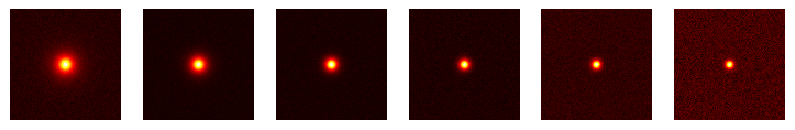

In [40]:
def draw_img(data, type='depth', idx=2, data_type='cylinder'):
    if type == 'depth':
        data = data['depth']
    elif type == 'concentration':
        data = data['concentration']
    elif type == 'fluorescence':
        data = data['fluorescence']
    elif type == 'reflectance':
        data = data['reflectance']
    elif type == 'optical_props':
        data = data['optical_props']
    else:
        raise ValueError(f'Invalid type: {type}')
    
    if data_type == 'cylinder': # 3 dim
        data = data
    elif data_type == 'phantom':
        data = data[idx, :, :, :]
    elif data_type == 'dt':
        data = data[idx, :, :, :]
    else:
        raise ValueError(f'Invalid data_type: {data_type}')
    
    if type == 'fluorescence' or type == 'reflectance':
        fig, axs = plt.subplots(1, 6, figsize=(10, 5))
        for i in range(6):
            axs[i].imshow(data[:, :, i], cmap='hot', interpolation='nearest')
            axs[i].axis('off')
        plt.show()
    elif type == 'optical_props':
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(data[:, :, 0], cmap='hot', interpolation='nearest')
        axs[0].set_title('mu_a')
        axs[0].axis('off')
        axs[1].imshow(data[:, :, 1], cmap='hot', interpolation='nearest')
        axs[1].set_title('mu_sp')
        axs[1].axis('off')
        plt.show()
    else:
        plt.imshow(data, cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.show()

draw_img(sample_cylinder_data_r1, type='fluorescence', idx=2, data_type='cylinder')

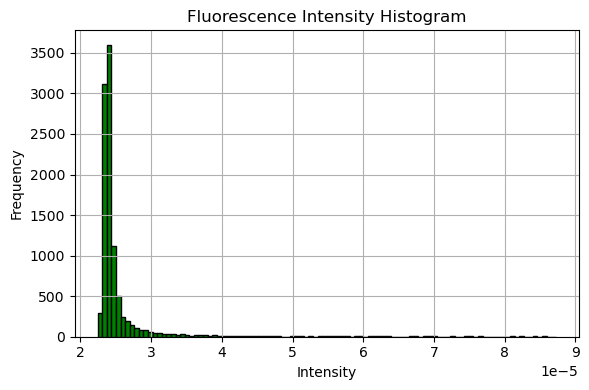

In [41]:
def draw_histogram(data, idx, data_type='cylinder'):

    if data_type == 'cylinder':
        data = data['fluorescence']
    elif data_type == 'phantom':
        data = data['fluorescence'][idx]
    elif data_type == 'dt':
        data = data['fluorescence'][idx]
    else:
        raise ValueError(f'Invalid data_type: {data_type}')

    d = data[:,:,0] # this is shape (101,101)
    pixels = d.ravel()

    plt.figure(figsize=(6, 4))
    plt.hist(pixels, bins=100, color='green', edgecolor='black')
    plt.title(f"Fluorescence Intensity Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

draw_histogram(sample_cylinder_data_r2, 2, data_type='cylinder')


# Physics Value Calculations

## boundary condition

In [42]:
def getReff_Haskell(n_in, n_out=1.0):
    """
    Compute the effective reflection coefficient Reff using Fresnel integrals (Haskell et al.).

    Parameters
    ----------
    n_in : float
        Refractive index of the tissue
    n_out : float
        Refractive index of the outside medium (default: 1.0 for air)

    Returns
    -------
    Reff : float
        Effective reflection coefficient
    """
    oc = np.arcsin(n_out / n_in)
    o = np.linspace(0, oc, 2000)
    coso = np.cos(o)
    cosop = np.sqrt(1 - (n_in / n_out)**2 * np.sin(o)**2)

    r_fres1 = ((n_in * cosop - n_out * coso) / (n_in * cosop + n_out * coso))**2
    r_fres2 = ((n_in * coso - n_out * cosop) / (n_in * coso + n_out * cosop))**2
    r_fres = 0.5 * (r_fres1 + r_fres2)

    sin_o = np.sin(o)

    r_phi_int = 2 * sin_o * coso * r_fres
    r_phi = np.trapz(r_phi_int, o)

    r_j_int = 3 * sin_o * coso**2 * r_fres
    r_j = np.trapz(r_j_int, o)

    Reff = (r_phi + r_j) / (2 - r_phi + r_j)
    return Reff

In [43]:
def gtxDTBoundaryCondition(nrel, method='Groenhuis'):
    """
    Compute boundary correction constants for diffuse reflectance and fluence modeling.

    Parameters
    ----------
    nrel : float
        Relative refractive index (e.g., 1.4)
    method : str
        Method to compute internal reflectance. Options: 'Groenhuis' (default), 'Haskell'

    Returns
    -------
    Cnd : float
        Correction factor for fluence rate at boundary
    K : float
        Extrapolated boundary constant
    rid : float
        Internal diffuse reflectance
    """
    if nrel == 1.0:
        rid = 0.0
        K = 1.0
    else:
        if method == 'Groenhuis':
            # Empirical formula from Cuccia (2009), based on Groenhuis (1983)
            rid = -1.44 / (nrel**2) + 0.71 / nrel + 0.67 + 0.0636 * nrel
        elif method == 'Haskell':
            rid = getReff_Haskell(nrel)
        else:
            raise ValueError(f"Unsupported boundary method: {method}")
        K = (1 + rid) / (1 - rid)

    Cnd = 2 * K
    return Cnd, K, rid

In [44]:
Cnd, K, rid = gtxDTBoundaryCondition(nrel=1.4)
print(f"Cnd = {Cnd:.3f}, K = {K:.3f}, rid = {rid:.3f}")

Cnd = 6.538, K = 3.269, rid = 0.531


## mueff

In [45]:
def compute_mueff(mu_a, mu_s, fx):
    """
    Compute the effective attenuation coefficient (mu_eff) used in diffusion theory.

    Parameters
    ----------
    mu_a : np.ndarray, shape (H, W)
        Absorption coefficient at excitation (mm⁻¹)
    mu_s : np.ndarray, shape (H, W)
        Reduced scattering coefficient at excitation (mm⁻¹)
    fx : np.ndarray, shape (F,)
        Spatial frequencies (mm⁻¹)

    Returns
    -------
    mu_eff : np.ndarray, shape (H, W, F)
        Effective attenuation coefficient at each pixel and frequency
    """

    # Diffusion coefficient D = 1 / (3 * (μₐ + μₛ′))
    mut = mu_a + mu_s  # shape (H, W)
    D = 1.0 / (3.0 * mut)  # shape (H, W)

    # Broadcasting with spatial frequencies
    mu_a_term = mu_a / D  # shape (H, W)
    mu_a_term = mu_a_term[:, :, np.newaxis]  # shape (H, W, 1)
    fx_term = (2 * np.pi * fx)**2  # shape (F,)

    mu_eff = np.sqrt(mu_a_term + fx_term[np.newaxis, np.newaxis, :])  # shape (H, W, F)

    return mu_eff

## fluence

In [48]:
def fluence_total(mu_a, mu_s, fx, z_vals, nrel=1.4, method='Cuccia'):
    """
    Compute fluence Φ(z, fx) at depth using spatial-frequency domain diffusion theory.

    Parameters
    ----------
    mu_a : np.ndarray, shape (H, W)
        Absorption coefficient
    mu_s : np.ndarray, shape (H, W)
        Reduced scattering coefficient
    fx : np.ndarray, shape (F,)
        Spatial frequencies (mm⁻¹)
    z_vals : np.ndarray, shape (Z,)
        Depths to evaluate fluence (mm)
    nrel : float
        Relative refractive index
    method : str
        Method for fluence calculation: 'Cuccia', 'Kim', or 'Gardner'

    Returns
    -------
    phi : np.ndarray, shape (H, W, Z, F)
        Fluence values at each pixel, depth, and spatial frequency
    """

    H, W = mu_a.shape
    F = len(fx)
    Z = len(z_vals)

    # Boundary condition constants
    Cnd, K, _ = gtxDTBoundaryCondition(nrel)

    mutr = mu_a + mu_s
    D = 1.0 / (3.0 * mutr)
    ap = mu_s / mutr

    # Compute effective attenuation coefficient
    mu_eff = compute_mueff(mu_a, mu_s, fx)

    # Expand for broadcasting
    z = z_vals[None, None, :, None]         # (1, 1, Z, 1)
    mu_eff = mu_eff[:, :, None, :]          # (H, W, 1, F)
    mutr = mutr[:, :, None, None]           # (H, W, 1, 1)
    ap = ap[:, :, None, None]               # (H, W, 1, 1)
    
    if method == 'Cuccia':
        # Cuccia model: valid for fx < 1/(3~4)utr
        A = 1/Cnd

        C0 = 3 * ap / (mu_eff**2 / mutr**2 - 1)
        C = - 3 * ap * (1 + 3*A) / ((mu_eff**2 / mutr**2 - 1) * (mu_eff / mutr + 3*A))
        phi = C0 * np.exp(-mutr * z) + C * np.exp(-mu_eff * z)  # (H, W, Z, F)

        return phi
    
    elif method == 'Kim':
        raise NotImplementedError("Kim model not implemented")
    
    elif method == 'Gardner':
        raise NotImplementedError("Gardner model not implemented")
    
    else:
        raise ValueError(f"Invalid method: {method}")

## Tef_z

In [53]:
def compute_Tef(mu_a_x, mu_s_x, mu_a_m, mu_s_m, fx, z_vals, nrel=1.4, fx_dependence=True, layer='top'):
    """
    Compute the depth-resolved transport kernel Tef(z, fx).

    Parameters
    ----------
    mu_a_x : np.ndarray, shape (H, W)
        Absorption at excitation
    mu_s_x : np.ndarray, shape (H, W)
        Scattering at excitation
    mu_a_m : np.ndarray, shape (H, W)
        Absorption at emission
    mu_s_m : np.ndarray, shape (H, W)
        Scattering at emission
    fx : np.ndarray, shape (F,)
        Spatial frequencies
    z_vals : np.ndarray, shape (Z,)
        Depths to integrate over
    nrel : float
        Relative refractive index
    fx_dependence : bool
        Whether emission fluence depends on fx (True for real data, False for sim)

    Returns
    -------
    Tef_z : np.ndarray, shape (H, W, Z, F)
        Depth-resolved transport kernel
    """

    if layer == 'top' and z_vals[0] > z_vals[-1]:
        raise ValueError("For layer='top', z_vals must increase from surface to depth")
    elif layer == 'bottom' and z_vals[0] < z_vals[-1]:
        raise ValueError("For layer='bottom', z_vals must decrease from depth to deeper layers")

    Cnd, _, _ = gtxDTBoundaryCondition(nrel)

    # Excitation fluence: Φ_x(z, fx)
    phi_x = fluence_total(mu_a_x, mu_s_x, fx, z_vals, nrel=nrel, method='Cuccia')  # (H, W, Z, F)

    # Emission fluence: Φ_m(z, fx) or Φ_m(z, f=0)
    if fx_dependence:
        phi_m = fluence_total(mu_a_m, mu_s_m, fx, z_vals, nrel=nrel, method='Cuccia')
    else:
        phi_m = fluence_total(mu_a_m, mu_s_m, np.array([0.0]), z_vals, nrel=nrel, method='Cuccia')
        phi_m = np.repeat(phi_m, len(fx), axis=3)  # replicate along fx dimension

    dz = np.gradient(z_vals)[None, None, :, None]  # (1, 1, Z, 1)
    product_term = phi_x * phi_m * dz

    if layer == 'top':
        Tef_z = np.cumsum(product_term, axis=2) / Cnd
    elif layer == 'bottom':
        Tef_z = np.cumsum(product_term[:, :, ::-1, :], axis=2)[:, :, ::-1, :] / Cnd
    else:
        raise ValueError(f"Invalid layer: {layer}")
    
    Tef = np.sum(product_term, axis=2) / Cnd
    
    return Tef, Tef_z, phi_x, phi_m

# Forward Model

## reflectance total

In [58]:
def compute_reflectance_total(mu_a, mu_s, fx, nrel=1.4, method='Cuccia'):    
    """
    Compute diffuse reflectance R_d using the Cuccia model for spatial-frequency domain imaging.

    Parameters:
    - mu_a: Absorption coefficient (H, W)
    - mu_s: Reduced scattering coefficient (H, W)
    - fx: Spatial frequencies (F,) or scalar
    - nrel: Relative refractive index (default = 1.4)

    Returns:
    - Rd: Diffuse reflectance (H, W, F)
    """

    mu_tr = mu_a + mu_s
    ap = mu_s / mu_tr

    # Expand dimensions for broadcasting
    mu_tr = mu_tr[..., np.newaxis]  # (H, W, 1)
    ap = ap[..., np.newaxis]        # (H, W, 1)

    mu_eff = compute_mueff(mu_a, mu_s, fx)

    Cnd, _, _ = gtxDTBoundaryCondition(nrel)
    A = 1/Cnd

    if method == 'Cuccia':
        Rd = 3 * A * ap / ((mu_eff**2 / mu_tr**2 + 1) * (mu_eff / mu_tr + 3 * A))
    elif method == 'Kim':
        raise NotImplementedError("Kim model not implemented")
    elif method == 'Gardner':
        raise NotImplementedError("Gardner model not implemented")
    else:
        raise ValueError(f"Invalid method: {method}")
    
    return Rd
    


## fluorescence total

In [ ]:
def compute_fluorescence_total(mua_x, mus_x, mua_m, mus_m, muaf_x, eta, nrel, fx, z_vals):
    """
    Compute total fluorescence using SFDI forward model.

    Parameters:
    - mua_x, mus_x: Absorption and scattering at excitation
    - mua_m, mus_m: Absorption and scattering at emission
    - muaf_x: Fluorophore absorption at excitation
    - eta: Quantum efficiency
    - nrel: Relative index of refraction
    - fx: Spatial frequencies (F,)
    - z_vals: Depths to evaluate fluence (mm)

    Returns:
    - F: Total fluorescence
    - R_x: Reflectance at excitation
    - R_m: Reflectance at emission

    """

    Tef, _, _, _ = compute_Tef(
        mua_x, mus_x,
        mua_m, mus_m,
        fx, z_vals,
        nrel=nrel,
        fx_dependence=True,
        layer='top' # or 'bottom' depends on the z_vals
    )

    qF = eta * muaf_x[..., np.newaxis] # (H, W, 1)
    F = qF * Tef

    R_x = compute_reflectance_total(mua_x, mus_x, fx, nrel=nrel)
    R_m = compute_reflectance_total(mua_m, mus_m, fx, nrel=nrel)

    return F, R_x, R_m

# Inverse

In [ ]:
def inverse_fluorescence_depth(F, fx, mua_x, mus_x, mua_m, mus_m, nrel, numerical_vars):
    """
    Estimate depth and fluorescence yield from fluorescence SFDI images.

    Parameters
    ----------
    F : ndarray of shape (H, W, F)
        Measured fluorescence images at different spatial frequencies.
    fx : ndarray of shape (F,)
        Spatial frequencies.
    mua_x, mus_x : ndarray of shape (H, W)
        Absorption and scattering at excitation.
    mua_m, mus_m : ndarray of shape (H, W)
        Absorption and scattering at emission.
    nrel : float
        Relative refractive index.
    numerical_vars : dict
        Parameters: fxDependence, hFl, zDelta, layerFl

    Returns
    -------
    z_est : ndarray of shape (H, W)
        Estimated depth.
    qF_est : ndarray of shape (H, W)
        Estimated fluorescence yield.
    """